In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

### Task 1

##### A

In [3]:
df1 = pd.read_csv(r'E:\ML Notes\ML Labs\Lab2 D1A.csv')
df2 = pd.read_csv(r'E:\ML Notes\ML Labs\Lab2 D1B.csv')
df3 = pd.read_csv(r'E:\ML Notes\ML Labs\Lab2 D1C.csv')
display(df1)
display(df2)

,fid,name,population,county,latitude
0,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597
1,9002,SETON ACADEMY FOR GIRLS,57,BRISTOL,41.718407
2,9003,ST ANNA SCHOOL,157,WORCESTER,42.517271
3,9004,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,41.818210
4,9005,DEVEREUX SCHOOL,123,WORCESTER,42.383875
...,...,...,...,...,...
26978,20996,MOST PRECIOUS BLOOD,33,WAUPACA,44.386281
26979,20997,STARR ACADEMY,29,WAUPACA,44.308621
26980,20998,ST JOHN'S LUTHERAN SCHOOL,24,WAUSHARA,44.202182
26981,20999,FAITH CHRISTIAN ACADEMY,13,WAUSHARA,44.074503


,name,population,county,longitude,level,enrollment,level.1
0,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary
1,SETON ACADEMY FOR GIRLS,57,BRISTOL,-71.147302,Elementary,49,Elementary
2,ST ANNA SCHOOL,157,WORCESTER,-71.751741,Elementary,143,Elementary
3,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,-71.083393,Elementary,4,Elementary
4,DEVEREUX SCHOOL,123,WORCESTER,-71.968419,Combined elementary and secondary,107,Combined elementary and secondary
...,...,...,...,...,...,...,...
26978,MOST PRECIOUS BLOOD,33,WAUPACA,-88.739200,Elementary,28,Elementary
26979,STARR ACADEMY,29,WAUPACA,-88.848294,Secondary,21,Secondary
26980,ST JOHN'S LUTHERAN SCHOOL,24,WAUSHARA,-88.886093,Elementary,22,Elementary
26981,FAITH CHRISTIAN ACADEMY,13,WAUSHARA,-89.294984,Elementary,11,Elementary


##### B

In [4]:
MergedData = df1.merge( df2, how ='inner' ,on=['name', 'population','county'])
display(MergedData)

,fid,name,population,county,latitude,longitude,level,enrollment,level.1
0,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary
1,9002,SETON ACADEMY FOR GIRLS,57,BRISTOL,41.718407,-71.147302,Elementary,49,Elementary
2,9003,ST ANNA SCHOOL,157,WORCESTER,42.517271,-71.751741,Elementary,143,Elementary
3,9004,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,41.818210,-71.083393,Elementary,4,Elementary
4,9005,DEVEREUX SCHOOL,123,WORCESTER,42.383875,-71.968419,Combined elementary and secondary,107,Combined elementary and secondary
...,...,...,...,...,...,...,...,...,...
27028,20996,MOST PRECIOUS BLOOD,33,WAUPACA,44.386281,-88.739200,Elementary,28,Elementary
27029,20997,STARR ACADEMY,29,WAUPACA,44.308621,-88.848294,Secondary,21,Secondary
27030,20998,ST JOHN'S LUTHERAN SCHOOL,24,WAUSHARA,44.202182,-88.886093,Elementary,22,Elementary
27031,20999,FAITH CHRISTIAN ACADEMY,13,WAUSHARA,44.074503,-89.294984,Elementary,11,Elementary


##### C

In [5]:
comboAC = df1.merge( df3, how ='inner' ,on=['county'])
display(comboAC)

,fid,name,population,county,latitude,city,score
0,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,SWANSEA,16
1,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,FALL RIVER,8
2,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,NEW BEDFORD,8
3,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,MANSFIELD,14
4,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,ATTLEBORO,5
...,...,...,...,...,...,...,...
4221328,20963,CONSERVE SCHOOL,65,VILAS,46.173898,LAND O'LAKES,7
4221329,20963,CONSERVE SCHOOL,65,VILAS,46.173898,EAGLE RIVER,4
4221330,20970,CHRIST LUTHERAN SCHOOL,53,VILAS,45.917744,LAND O'LAKES,7
4221331,20970,CHRIST LUTHERAN SCHOOL,53,VILAS,45.917744,EAGLE RIVER,4


### Task 2

##### A

In [6]:
import numpy as np
Size = list(map(lambda _: np.random.choice(['small','medium','high']).item(), range(27033)))
Cardinal = list(map(lambda _: np.random.choice(['north','south','east','west']).item(), range(27033)))
Timings = list(map(lambda _: np.random.choice(['full time','part time']).item(), range(27033)))
days = list(map(lambda _: np.random.choice(['friday','saturday','sunday']).item(), range(27033)))
hours = list(map(lambda _: np.random.choice([8,9,10,11,12]).item(),range(27033)))
CustomizedData = pd.DataFrame({
  'county': MergedData['county'],
  'Size': Size,
  'Cardinal Direction': Cardinal,
  'Timings': Timings,
  'days': days,
  'hours': hours
  }
)
display(CustomizedData)

,county,Size,Cardinal Direction,Timings,days,hours
0,BRISTOL,medium,north,part time,friday,10
1,BRISTOL,small,east,full time,sunday,8
2,WORCESTER,small,north,full time,sunday,9
3,PLYMOUTH,small,west,full time,saturday,11
4,WORCESTER,high,west,part time,friday,10
...,...,...,...,...,...,...
27028,WAUPACA,medium,south,part time,sunday,9
27029,WAUPACA,high,north,part time,sunday,11
27030,WAUSHARA,high,south,full time,sunday,11
27031,WAUSHARA,small,east,part time,sunday,11


In [7]:
merge_df1_df2 = df2.merge(df1)
modifiedData = CustomizedData.merge( merge_df1_df2, how ='inner' ,on=['county'])

display(modifiedData)

,county,Size,Cardinal Direction,Timings,days,hours,name,population,longitude,level,enrollment,level.1,fid,latitude
0,BRISTOL,medium,north,part time,friday,10,NEW ENGLAND CHRISTIAN ACADEMY,136,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary,9001,41.758597
1,BRISTOL,medium,north,part time,friday,10,SETON ACADEMY FOR GIRLS,57,-71.147302,Elementary,49,Elementary,9002,41.718407
2,BRISTOL,medium,north,part time,friday,10,NATIVITY PREPARATORY SCHOOL OF NEW BEDFORD,62,-70.926852,Elementary,54,Elementary,9006,41.633263
3,BRISTOL,medium,north,part time,friday,10,ST MARY'S CATHOLIC SCHOOL,233,-71.202492,Elementary,219,Elementary,9009,42.035372
4,BRISTOL,medium,north,part time,friday,10,AMEGO,24,-71.240718,Combined elementary and secondary,19,Combined elementary and secondary,9013,42.012844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249888,VILAS,high,south,full time,friday,8,CONSERVE SCHOOL,65,-89.301982,Secondary,58,Secondary,20963,46.173898
4249889,VILAS,high,south,full time,friday,8,CHRIST LUTHERAN SCHOOL,53,-89.245837,Elementary,49,Elementary,20970,45.917744
4249890,VILAS,high,south,full time,friday,9,CONSERVE SCHOOL,65,-89.301982,Secondary,58,Secondary,20963,46.173898
4249891,VILAS,high,south,full time,friday,9,CHRIST LUTHERAN SCHOOL,53,-89.245837,Elementary,49,Elementary,20970,45.917744


### Task 3

##### A,B,C

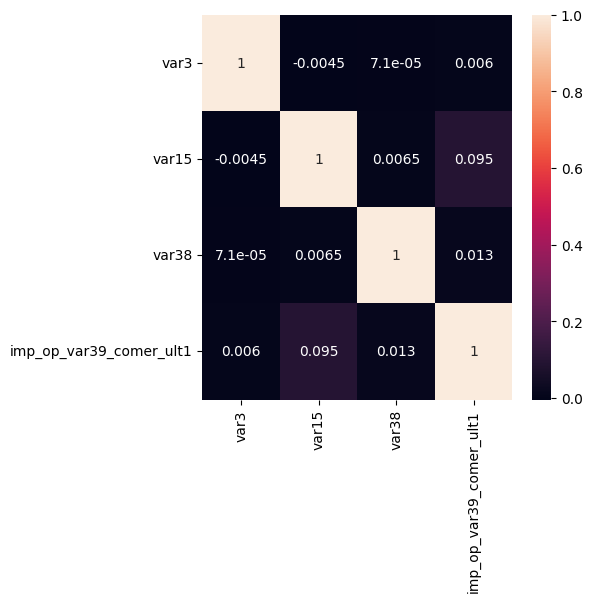

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
t3 = pd.read_csv(r"E:\ML Notes\ML Labs\train.csv")

corr_col = ['var3','var15','var38','imp_op_var39_comer_ult1']
df4 = t3[corr_col]
plt.figure(figsize=(5,5))
sns.heatmap(data=df4.corr(),annot=True)
plt.show()

##### D,E

In [ ]:
display(t3)
t3.isnull().sum()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

##### G,H

In [11]:
from sklearn.utils import resample


majority = t3[t3['TARGET'] == 0]   
minority = t3[t3['TARGET'] == 1]  

print("Before balancing:")
print(t3['TARGET'].value_counts())

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,          
                              n_samples=len(majority),  
                              random_state=42)       


t3_balanced = pd.concat([majority, minority_upsampled])

print("\nAfter balancing:")
print(t3_balanced['TARGET'].value_counts())

Before balancing:
TARGET
0    73012
1     3008
Name: count, dtype: int64

After balancing:
TARGET
0    73012
1    73012
Name: count, dtype: int64


In [12]:
display(t3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [13]:
# I)
import pandas as pd
import copy

df = t3.copy(deep=True)

X = df.drop(columns=['TARGET'])
y = df['TARGET']

correlations = X.corrwith(y)
correlations = correlations.abs().sort_values(ascending=False)

print("Feature correlations with target:")
print(correlations)


selected_features = correlations[correlations > 0.1].index
print("Selected Features:", selected_features)

Feature correlations with target:
ind_var30                        0.149811
num_meses_var5_ult3              0.148253
num_var30                        0.138289
num_var42                        0.135693
ind_var5                         0.135349
                                   ...   
num_reemb_var33_hace3                 NaN
num_trasp_var17_out_hace3             NaN
num_trasp_var33_out_hace3             NaN
saldo_var2_ult1                       NaN
saldo_medio_var13_medio_hace3         NaN
Length: 370, dtype: float64
Selected Features: Index(['ind_var30', 'num_meses_var5_ult3', 'num_var30', 'num_var42',
       'ind_var5', 'num_var5', 'var36', 'var15'],
      dtype='object')


In [14]:
# J)
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SelectKBest
df5 = t3.copy(deep=True)


X = df5[selected_features]
y = df5['TARGET']

mi_scores = mutual_info_classif(X, y, random_state=42)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print(mi_df)


selector = SelectKBest(mutual_info_classif, k=5)
X_selected = selector.fit_transform(X, y)

print("Selected Features:")
print(X.columns[selector.get_support()])

               Feature  MI Score
0            ind_var30  0.024764
5             num_var5  0.024215
3            num_var42  0.024176
4             ind_var5  0.024040
1  num_meses_var5_ult3  0.020370
2            num_var30  0.018062
7                var15  0.014235
6                var36  0.012305
Selected Features:
Index(['ind_var30', 'num_meses_var5_ult3', 'num_var42', 'ind_var5',
       'num_var5'],
      dtype='object')


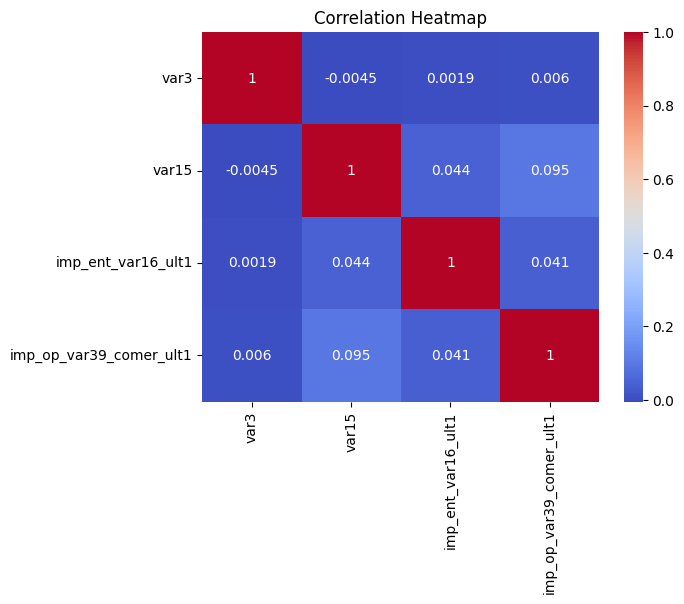

In [15]:
# F)
corr = df[["var3","var15","imp_ent_var16_ult1","imp_op_var39_comer_ult1"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Task 4

In [16]:
# The survey contains 10 questions about technology usage:

# Age (numerical)
# Gender (categorical: Male, Female, Other)
# Education Level (categorical: High School, Bachelor's, Master's, PhD)
# Employment Status (categorical: Employed, Student, Unemployed, Retired)
# Primary Device (categorical: Smartphone, Laptop, Tablet, Desktop)
# Daily Screen Time (numerical, hours)
# Social Media Usage (categorical: Low, Medium, High)
# E-commerce Frequency (categorical: Rarely, Monthly, Weekly, Daily)
# Tech Comfort Level (numerical, 1-10 scale)
# Privacy Concern Level (numerical, 1-10 scale)

In [17]:
# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 100

data = {
    'Age': np.random.randint(18, 70, n_samples),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], n_samples, p=[0.45, 0.45, 0.1]),
    'Education': np.random.choice(['High School', 'Bachelor\'s', 'Master\'s', 'PhD'], n_samples, p=[0.3, 0.4, 0.2, 0.1]),
    'Employment': np.random.choice(['Employed', 'Student', 'Unemployed', 'Retired'], n_samples, p=[0.6, 0.2, 0.15, 0.05]),
    'Primary_Device': np.random.choice(['Smartphone', 'Laptop', 'Tablet', 'Desktop'], n_samples, p=[0.5, 0.3, 0.1, 0.1]),
    'Screen_Time': np.random.uniform(2, 12, n_samples).round(1),
    'Social_Media': np.random.choice(['Low', 'Medium', 'High'], n_samples, p=[0.3, 0.4, 0.3]),
    'Ecommerce': np.random.choice(['Rarely', 'Monthly', 'Weekly', 'Daily'], n_samples, p=[0.2, 0.3, 0.3, 0.2]),
    'Tech_Comfort': np.random.randint(1, 11, n_samples),
    'Privacy_Concern': np.random.randint(1, 11, n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Introduce missing values (10% of optional questions)
optional_cols = ['Screen_Time', 'Social_Media', 'Ecommerce', 'Tech_Comfort', 'Privacy_Concern']
for col in optional_cols:
    mask = np.random.rand(n_samples) < 0.1
    df.loc[mask, col] = np.nan

# Introduce duplicates (5% of records)
duplicate_indices = np.random.choice(n_samples, size=5, replace=False)
df = pd.concat([df, df.iloc[duplicate_indices]], ignore_index=True)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (105, 10)


,Age,Gender,Education,Employment,Primary_Device,Screen_Time,Social_Media,Ecommerce,Tech_Comfort,Privacy_Concern
0,56,Male,Bachelor's,Student,Smartphone,7.3,Low,NaN,10.0,9.0
1,69,Male,Master's,Employed,Smartphone,6.4,High,Rarely,NaN,1.0
2,46,Male,Bachelor's,Employed,Smartphone,10.0,Medium,NaN,6.0,4.0
3,32,Male,High School,Employed,Smartphone,11.8,Medium,Rarely,6.0,6.0
4,60,Male,Master's,Employed,Smartphone,7.6,High,Daily,4.0,6.0


In [27]:
print("\n--- Descriptive Statistics ---")
print(df.describe(include="all"))


--- Descriptive Statistics ---
               Age Gender   Education Employment Primary_Device  Screen_Time  \
count   105.000000    105         105        105            105    95.000000   
unique         NaN      3           4          4              4          NaN   
top            NaN   Male  Bachelor's   Employed     Smartphone          NaN   
freq           NaN     53          44         62             53          NaN   
mean     43.561905    NaN         NaN        NaN            NaN     6.740000   
std      15.019810    NaN         NaN        NaN            NaN     2.958486   
min      19.000000    NaN         NaN        NaN            NaN     2.100000   
25%      32.000000    NaN         NaN        NaN            NaN     4.400000   
50%      42.000000    NaN         NaN        NaN            NaN     6.400000   
75%      57.000000    NaN         NaN        NaN            NaN     9.350000   
max      69.000000    NaN         NaN        NaN            NaN    12.000000   

       

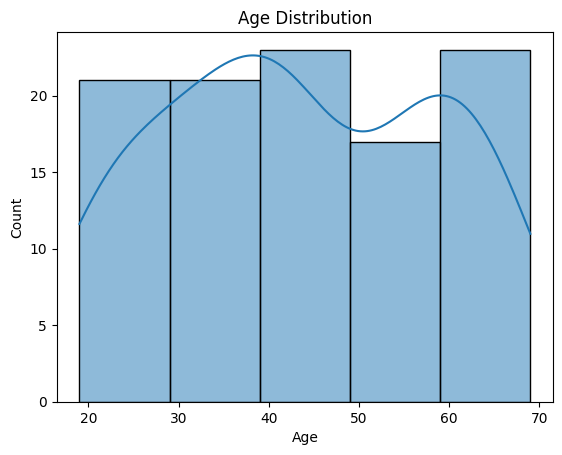

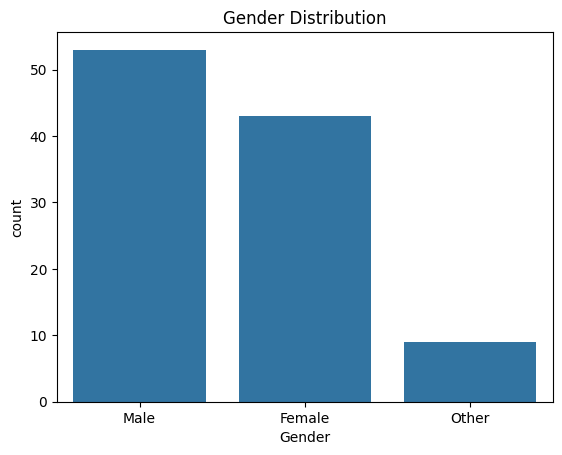

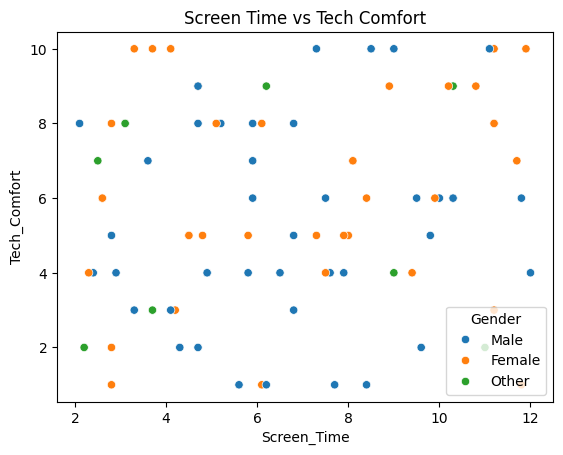

In [28]:
# Age distribution
sns.histplot(df["Age"], bins=5, kde=True)
plt.title("Age Distribution")
plt.show()

# Gender count
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

# Screen Time vs Tech Comfort
sns.scatterplot(x="Screen_Time", y="Tech_Comfort", hue="Gender", data=df)
plt.title("Screen Time vs Tech Comfort")
plt.show()


In [29]:
print("\n--- Balance Check (Gender) ---")
print(df["Gender"].value_counts(normalize=True))


--- Balance Check (Gender) ---
Gender
Male      0.504762
Female    0.409524
Other     0.085714
Name: proportion, dtype: float64


In [31]:
# Convert Ecommerce column to numeric (coerce invalid entries to NaN)
df["Ecommerce"] = pd.to_numeric(df["Ecommerce"], errors="coerce")

# Now you can fill missing values with mean
df["Ecommerce_mean_filled"] = df["Ecommerce"].fillna(df["Ecommerce"].mean())

# Alternative: forward fill
df["Ecommerce_ffill"] = df["Ecommerce"].fillna(method="ffill")

print(df[["Ecommerce", "Ecommerce_mean_filled", "Ecommerce_ffill"]])

     Ecommerce  Ecommerce_mean_filled  Ecommerce_ffill
0          NaN                    NaN              NaN
1          NaN                    NaN              NaN
2          NaN                    NaN              NaN
3          NaN                    NaN              NaN
4          NaN                    NaN              NaN
..         ...                    ...              ...
100        NaN                    NaN              NaN
101        NaN                    NaN              NaN
102        NaN                    NaN              NaN
103        NaN                    NaN              NaN
104        NaN                    NaN              NaN

[105 rows x 3 columns]


In [32]:
# Example: Random Oversampling
from sklearn.utils import resample

df_majority = df[df["Gender"]=="Male"]
df_minority = df[df["Gender"]=="Female"]

df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

df_balanced = pd.concat([df_majority, df_minority_oversampled])
print("\nBalanced Gender Counts:\n", df_balanced["Gender"].value_counts())



Balanced Gender Counts:
 Gender
Male      53
Female    53
Name: count, dtype: int64


In [40]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Encode categorical features
encoded_df = df.copy()
for col in encoded_df.select_dtypes(include=["object"]).columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

X = encoded_df.drop("Gender", axis=1)  # Features
y = encoded_df["Gender"]               # Target
feature_names = X.columns              # Save feature names before conversion

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply Chi-Square Feature Selection
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X_scaled, y)

# Map selected features back to names
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

print("\nSelected Features (Chi-Square):", selected_features)


Selected Features (Chi-Square): ['Age', 'Employment', 'Screen_Time', 'Social_Media', 'Ecommerce']


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Ecommerce' 'Ecommerce_mean_filled' 'Ecommerce_ffill']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [41]:
df_dummy = pd.get_dummies(df, columns=["Gender", "Education"], drop_first=True)
print("\nDummy Encoded Data:\n", df_dummy.head())



Dummy Encoded Data:
    Age Employment Primary_Device  Screen_Time Social_Media  Ecommerce  \
0   56    Student     Smartphone          7.3          Low        NaN   
1   69   Employed     Smartphone          6.4         High        NaN   
2   46   Employed     Smartphone         10.0       Medium        NaN   
3   32   Employed     Smartphone         11.8       Medium        NaN   
4   60   Employed     Smartphone          7.6         High        NaN   

   Tech_Comfort  Privacy_Concern  Ecommerce_mean_filled  Ecommerce_ffill  \
0          10.0              9.0                    NaN              NaN   
1           NaN              1.0                    NaN              NaN   
2           6.0              4.0                    NaN              NaN   
3           6.0              6.0                    NaN              NaN   
4           4.0              6.0                    NaN              NaN   

   is_duplicate  Gender_Male  Gender_Other  Education_High School  \
0         Fal

In [42]:
# Check duplicates
print("\nDuplicate Records:", df.duplicated().sum())

# Method 1: Drop duplicates
df_no_dupes = df.drop_duplicates()

# Method 2: Keep first occurrence, mark others
df["is_duplicate"] = df.duplicated()



Duplicate Records: 5
